In [2]:
!pip install pystan~=2.14
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 7.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 59.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9434467 sha256=a9b02bfe75481d48d328e26d027164c1c389d43fa22d33048398c99c9916852a
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fbprophet import Prophet
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
data_url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'

In [5]:
df = pd.read_csv(data_url)

In [6]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


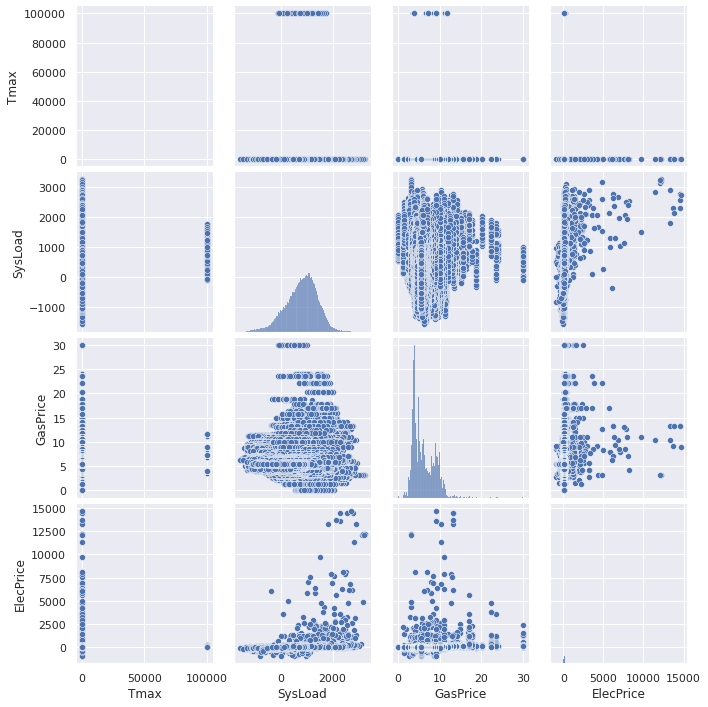

In [7]:
sns.pairplot(df, hue='species')

In [8]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [12]:
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [73]:
df_daily = df.resample('D', on='FullDate').sum()

In [74]:
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [76]:
train = df_daily.iloc[:2757]

In [77]:
test = df_daily.iloc[2757:]

In [78]:
train

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2018-03-15,609.6,27139.02585,220.6272,2717.340
2018-03-16,648.0,19710.46400,216.9600,2277.335
2018-03-17,724.8,1079.34705,209.0400,1718.385


In [79]:
test

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2018-03-20,540.0,7696.91130,201.5880,1833.000
2018-03-21,571.2,4658.05865,203.2560,1730.490
2018-03-22,722.4,19161.78525,203.2560,2260.550
2018-03-23,811.2,18090.43435,198.6456,2138.760
2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [80]:
train=train.reset_index()

In [81]:
df_tt = train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [82]:
df_tt.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [83]:
model = Prophet()
model.fit(df_tt)

Initial log joint probability = -4.20632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8006.42   0.000190736       172.415           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8007.2    4.4511e-05       55.1814      0.8319      0.8319      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       8007.24   0.000127972       100.748   1.491e-06       0.001      313  LS failed, Hessian reset 
     299       8007.56   3.00801e-05       44.3474      0.5552      0.5552      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       8007.61   4.26709e-05       140.953   1.449e-07       0.001      531  LS failed, Hessian reset 
     399       8007.64   7.42204e-06       64.1818      0.0646           1      606   
    Iter      log pro

In [84]:
future = model.make_future_dataframe(periods= 100 , freq= 'D' ) 
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,849.455287,-1430.873366,3305.336921,849.455287,849.455287,143.855508,143.855508,143.855508,159.362662,159.362662,159.362662,-15.507154,-15.507154,-15.507154,0.0,0.0,0.0,993.310795
1,2010-09-02,849.407108,-1401.686033,3521.490589,849.407108,849.407108,224.160554,224.160554,224.160554,257.120465,257.120465,257.120465,-32.959911,-32.959911,-32.959911,0.0,0.0,0.0,1073.567661
2,2010-09-03,849.358928,-1563.198803,3325.541155,849.358928,849.358928,-0.874031,-0.874031,-0.874031,50.276079,50.276079,50.276079,-51.150110,-51.150110,-51.150110,0.0,0.0,0.0,848.484897
3,2010-09-04,849.310749,-1963.799638,2821.493657,849.310749,849.310749,-341.197592,-341.197592,-341.197592,-271.455104,-271.455104,-271.455104,-69.742488,-69.742488,-69.742488,0.0,0.0,0.0,508.113157
4,2010-09-05,849.262569,-1884.866953,2934.873608,849.262569,849.262569,-431.170926,-431.170926,-431.170926,-342.740678,-342.740678,-342.740678,-88.430247,-88.430247,-88.430247,0.0,0.0,0.0,418.091644


<Figure size 4320x4320 with 0 Axes>

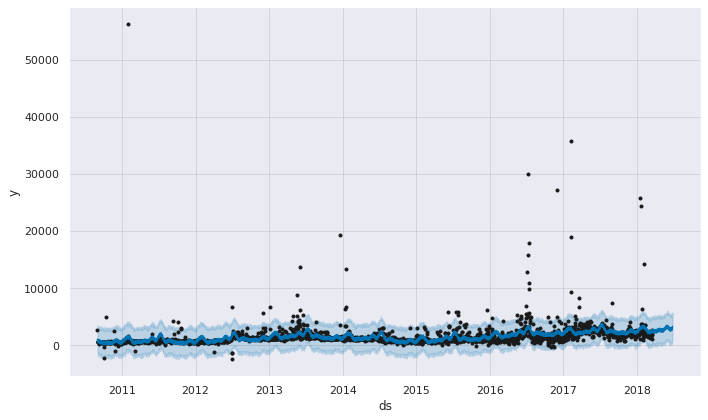

In [85]:
plt.figure(figsize=(60,60))
model.plot(forecast)
plt.show()

In [86]:
train2 = train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y", 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3' })

In [87]:
train2

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [88]:
model2 = Prophet()
model2.fit(train2)

Initial log joint probability = -4.20632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8006.42   0.000190736       172.415           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8007.2    4.4511e-05       55.1814      0.8319      0.8319      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       8007.24   0.000127972       100.748   1.491e-06       0.001      313  LS failed, Hessian reset 
     299       8007.56   3.00801e-05       44.3474      0.5552      0.5552      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       8007.61   4.26709e-05       140.953   1.449e-07       0.001      531  LS failed, Hessian reset 
     399       8007.64   7.42204e-06       64.1818      0.0646           1      606   
    Iter      log pro

In [89]:
future2 = model.make_future_dataframe(100, freq='D', )
forecast2 = model.predict(future2)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,849.455287,-1430.873366,3305.336921,849.455287,849.455287,143.855508,143.855508,143.855508,159.362662,159.362662,159.362662,-15.507154,-15.507154,-15.507154,0.0,0.0,0.0,993.310795
1,2010-09-02,849.407108,-1401.686033,3521.490589,849.407108,849.407108,224.160554,224.160554,224.160554,257.120465,257.120465,257.120465,-32.959911,-32.959911,-32.959911,0.0,0.0,0.0,1073.567661
2,2010-09-03,849.358928,-1563.198803,3325.541155,849.358928,849.358928,-0.874031,-0.874031,-0.874031,50.276079,50.276079,50.276079,-51.150110,-51.150110,-51.150110,0.0,0.0,0.0,848.484897
3,2010-09-04,849.310749,-1963.799638,2821.493657,849.310749,849.310749,-341.197592,-341.197592,-341.197592,-271.455104,-271.455104,-271.455104,-69.742488,-69.742488,-69.742488,0.0,0.0,0.0,508.113157
4,2010-09-05,849.262569,-1884.866953,2934.873608,849.262569,849.262569,-431.170926,-431.170926,-431.170926,-342.740678,-342.740678,-342.740678,-88.430247,-88.430247,-88.430247,0.0,0.0,0.0,418.091644


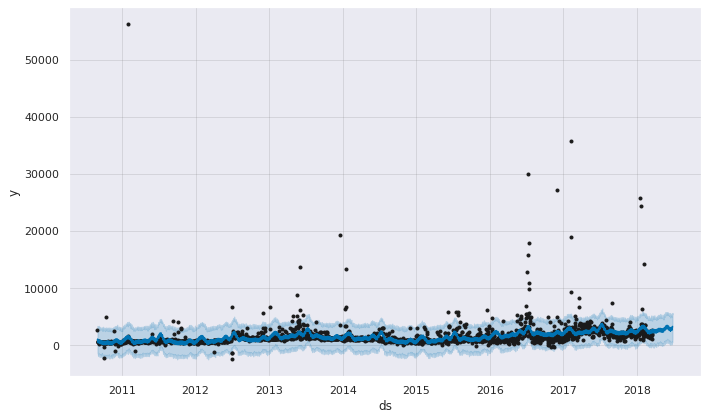

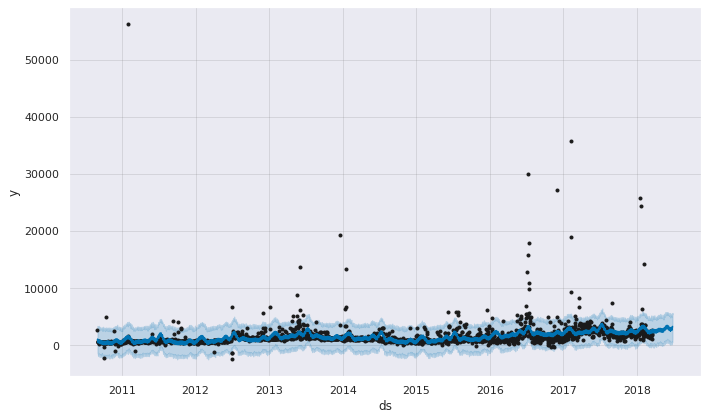

In [90]:
model.plot(forecast2)

In [62]:
df_daily2 = df.resample('D', on='FullDate').sum()

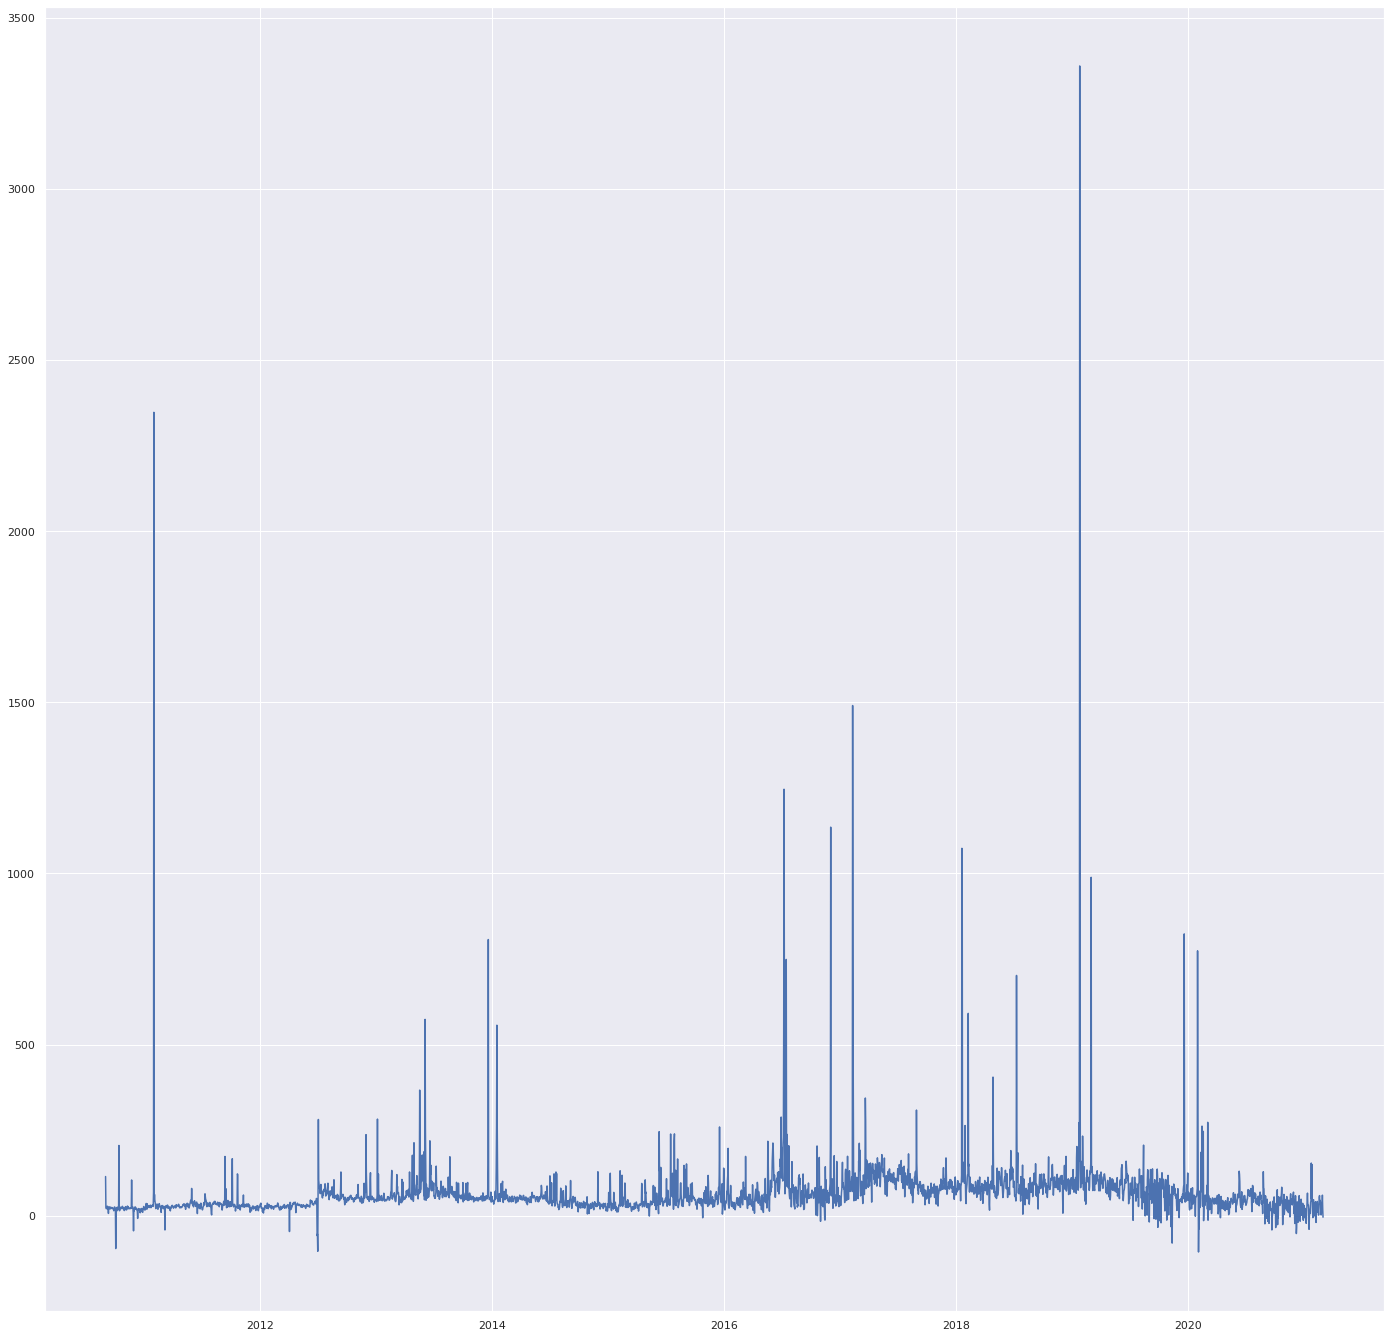

In [63]:
plt.figure(figsize=(24,24))
plt.plot(df_daily2.reset_index().FullDate, df_daily.ElecPrice)

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [69]:
adf_test(df_daily2['SysLoad'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.690159
p-value                           0.004254
#Lags Used                       30.000000
Number of Observations Used    3803.000000
Critical Value (1%)              -3.432071
Critical Value (5%)              -2.862300
Critical Value (10%)             -2.567175
dtype: float64


In [72]:
adf_test(df_daily2['GasPrice'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.902767
p-value                           0.045027
#Lags Used                       27.000000
Number of Observations Used    3806.000000
Critical Value (1%)              -3.432069
Critical Value (5%)              -2.862300
Critical Value (10%)             -2.567174
dtype: float64


In [ ]:
model.predict()